In [ ]:
pip install pyswarms

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.1/104.1 kB 5.1 MB/s eta 0:00:00


In [ ]:
%pip install bayesian-optimization==1.4.1

In [ ]:
pip install scikit-optimize

In [ ]:
#@title dataset stationery check
import pandas as pd
from statsmodels.tsa.stattools import adfuller

# Assuming your dataset is stored in a pandas DataFrame named 'data'
# with a single column named 'value' representing the time series data
data=pd.read_csv("MSFT.csv")

# Perform ADF test
result = adfuller(data['Close'])

# Extract and print the test statistics and p-value
adf_statistic = result[0]
p_value = result[1]
print(f'ADF Statistic: {adf_statistic}')
print(f'p-value: {p_value}')

# Interpret the results
if p_value < 0.05:
    print('The dataset is stationary.')
else:
    print('The dataset is non-stationary.')


ADF Statistic: 5.34410335468045
p-value: 1.0
The dataset is non-stationary.


         Date      Open      High       Low     Close  Adj Close      Volume
0  1986-03-13  0.088542  0.101563  0.088542  0.097222   0.061434  1031788800
1  1986-03-14  0.097222  0.102431  0.097222  0.100694   0.063628   308160000
2  1986-03-17  0.100694  0.103299  0.100694  0.102431   0.064725   133171200
3  1986-03-18  0.102431  0.103299  0.098958  0.099826   0.063079    67766400
4  1986-03-19  0.099826  0.100694  0.097222  0.098090   0.061982    47894400
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9083 entries, 0 to 9082
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       9083 non-null   object 
 1   Open       9083 non-null   float64
 2   High       9083 non-null   float64
 3   Low        9083 non-null   float64
 4   Close      9083 non-null   float64
 5   Adj Close  9083 non-null   float64
 6   Volume     9083 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 496.9+ KB
None
 af

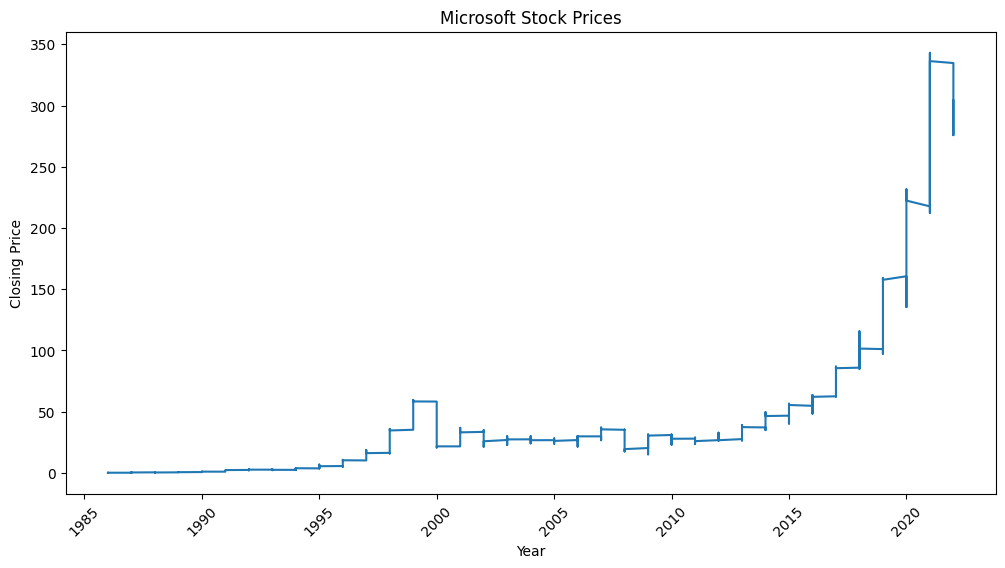

Statisitcs
              Open         High          Low        Close    Adj Close  \
count  9083.000000  9083.000000  9083.000000  9083.000000  9083.000000   
mean     41.324936    41.760887    40.878488    41.335628    36.256120   
std      59.696905    60.272218    59.081728    59.714567    59.981436   
min       0.088542     0.092014     0.088542     0.090278     0.057046   
25%       4.050781     4.102051     4.027344     4.075195     2.575089   
50%      26.820000    27.100000    26.520000    26.840000    18.948530   
75%      40.034999    40.443751    39.500000    39.937500    29.244812   
max     344.619995   349.670013   342.200012   343.109985   342.402008   

             Volume         Year  
count  9.083000e+03  9083.000000  
mean   5.875055e+07  2003.693934  
std    3.845200e+07    10.412010  
min    2.304000e+06  1986.000000  
25%    3.461230e+07  1995.000000  
50%    5.203200e+07  2004.000000  
75%    7.265400e+07  2013.000000  
max    1.031789e+09  2022.000000  


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Load the dataset
df = pd.read_csv('MSFT.csv')

# Step 2: Check the structure of the dataset
print(df.head())  # Display the first few rows
print(df.info())  # Summary of the dataset

# Step 3: Data cleaning (if required)
df.dropna()
print(" after removing null values")
print("Count of null values",df.isna().sum().sum())

# Step 4: Data visualization
# Extract year from 'Date' column
df['Year'] = pd.to_datetime(df['Date']).dt.year

# Line plot of stock prices over time with years on x-axis
plt.figure(figsize=(12, 6))
plt.plot(df['Year'], df['Close'])
plt.xlabel('Year')
plt.ylabel('Closing Price')
plt.title('Microsoft Stock Prices')
plt.xticks(rotation=45)
plt.show()

# Step 5: Summary statistics
print("Statisitcs")
print(df.describe())





2023-07-09 21:02:35,403 - pyswarms.single.global_best - INFO - Optimize for 10 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best: 100%|██████████|10/10, best_cost=0.57
2023-07-09 21:03:09,809 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 0.5698046720630426, best pos: [  0.86108217   3.6061077  679.80990125]


Mean Squared Error: 0.5698046720630426


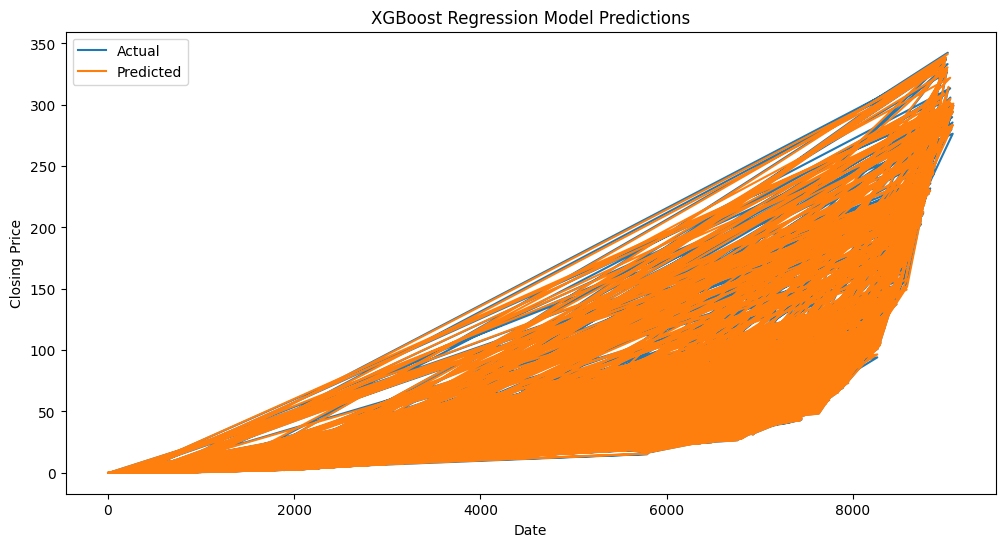

In [ ]:
#@title xgboost with pso
import pandas as pd
import numpy as np
from xgboost import XGBRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from pyswarms.single.global_best import GlobalBestPSO

# Load the dataset
df = pd.read_csv('MSFT.csv')



# Split the data into features (X) and target (y)
X = df[['High','Low','Open']]
y = df['Close']



# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features using the StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# Define the objective function for PSO optimization
def xgb_mse(params):
    learning_rate = params[0][0]
    max_depth = int(params[0][1])
    n_estimators = int(params[0][2])
    model = XGBRegressor(learning_rate=learning_rate, max_depth=max_depth, n_estimators=n_estimators)
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    mse = mean_squared_error(y_test, y_pred)
    return mse

# Set up PSO optimization
options = {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
bounds = (np.array([1e-6, 1, 1]), np.array([1, 10, 1000]))
optimizer = GlobalBestPSO(n_particles=10, dimensions=3, options=options, bounds=bounds)

# Perform optimization
best_cost, best_pos = optimizer.optimize(xgb_mse, iters=10)

# Extract the optimized hyperparameters
learning_rate_optimized = best_pos[0]
max_depth_optimized = int(best_pos[1])
n_estimators_optimized = int(best_pos[2])

# Train the model with optimized hyperparameters
optimized_model = XGBRegressor(
    learning_rate=learning_rate_optimized,
    max_depth=max_depth_optimized,
    n_estimators=n_estimators_optimized
)
optimized_model.fit(X_train_scaled, y_train)

# Make predictions on the testing set
y_pred = optimized_model.predict(X_test_scaled)

# Compute the mean squared error of the predictions
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

# Plot the predicted and actual closing prices over time
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred}, index=y_test.index)
plt.figure(figsize=(12, 6))
plt.plot(results.index, results['Actual'], label='Actual')
plt.plot(results.index, results['Predicted'], label='Predicted')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('XGBoost Regression Model Predictions')
plt.show()


In [ ]:
print("TIme take to perform XGboost with PSO:",end-start)

TIme take to perform XGboost with PSO: 62.414994955062866


In [ ]:
#@title xgboost with optimized parameters using pso
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import mean_squared_error
import statistics
from sklearn.metrics import mean_absolute_error as mae

# Load the data from CSV file
df = pd.read_csv('MSFT.csv')

# Preprocess the data and extract features
# Ensure that your dataset has appropriate columns for features and target variable

# Split the data into features and target variable
X = df[['High', 'Low','Open']]  # Replace 'feature1', 'feature2', ... with your actual feature columns
y = df['Close']  # Replace 'Close' with your actual target variable column

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model with the best hyperparameters
model = xgb.XGBRegressor(
    learning_rate=0.86108217,
    max_depth=3,
    n_estimators=int(679.80990125)
)
model.fit(X_train, y_train)



# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)



error = mae(y_test, y_pred) #mean absolute error
print("Mean absolute error",error)

Mean Squared Error: 0.5700859444523991
Mean absolute error 0.3146821349517634


In [ ]:
# @title svr with pso
import pandas as pd
import numpy as np
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from pyswarms.single.global_best import GlobalBestPSO

# Load the dataset
df = pd.read_csv("MSFT.csv")

# Split the data into features (X) and target (y)
X = df[['High','Low','Open']]
y = df['Close']


# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features using the StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# # Define the objective function for PSO optimization

# Define the objective function for PSO optimization
def svr_mse(params):
    C = params[0][0]  # Extract the float value from the array
    gamma = params[0][1]  # Extract the float value from the array
    model = SVR(kernel='rbf', C=C, gamma=gamma)
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    mse = mean_squared_error(y_test, y_pred)
    return mse



2023-07-09 21:04:50,181 - pyswarms.single.global_best - INFO - Optimize for 10 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best: 100%|██████████|10/10, best_cost=0.461
2023-07-09 21:05:55,284 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 0.4607336519344458, best pos: [29.68385865 15.71391061]


Mean Squared Error: 0.4607336519344458


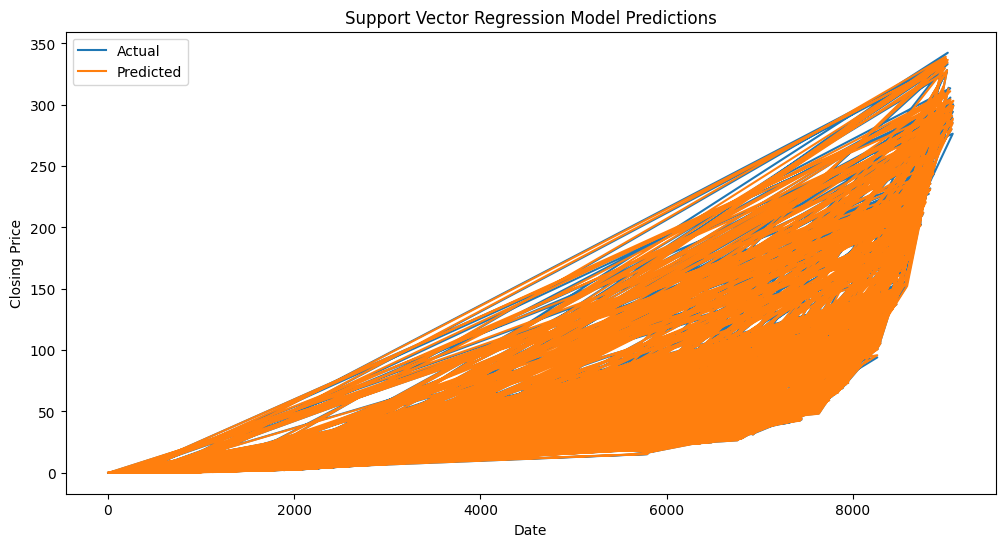

In [ ]:
# Set up PSO optimization
options = {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
bounds = (np.array([1e-6, 1e-6]), np.array([100, 100]))
optimizer = GlobalBestPSO(n_particles=10, dimensions=2, options=options, bounds=bounds)  # Set dimensions to 1

# Perform optimization
best_cost, best_pos = optimizer.optimize(svr_mse, iters=10)

# Extract the optimized hyperparameters
C_optimized = best_pos[0] # Extract the float value from the array
gamma_optimized = best_pos[1]  # Extract the float value from the array

# Train the model with optimized hyperparameters
optimized_model = SVR(kernel='rbf', C=C_optimized, gamma=gamma_optimized)
optimized_model.fit(X_train_scaled, y_train)

# Make predictions on the testing set
y_pred = optimized_model.predict(X_test_scaled)

# Compute the mean squared error of the predictions
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

# Plot the predicted and actual closing prices over time
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred}, index=y_test.index)
plt.figure(figsize=(12, 6))
plt.plot(results.index, results['Actual'], label='Actual')
plt.plot(results.index, results['Predicted'], label='Predicted')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('Support Vector Regression Model Predictions')
plt.show()

In [ ]:
print("TIme taken to perform SVR with PSO",end-start)

TIme taken to perform SVR with PSO 110.62707543373108


Best Hyperparameters: OrderedDict([('C', 3.226006340040651), ('gamma', 0.1408961921129918), ('kernel', 'rbf')])
Best Mean Squared Error: -0.9982768807719857
Mean Squared Error: 4.1639548982361045
0.49746178474578856


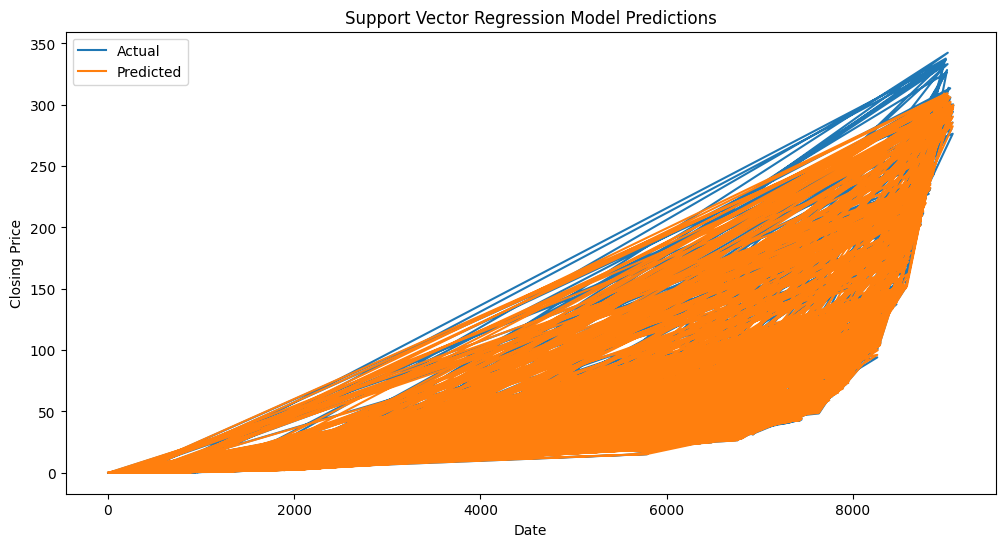

Time take to run SVR with Bayesian Optimization 180.5709798336029


In [ ]:
# @title  support vector using bayesian
import pandas as pd
import numpy as np
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from skopt import BayesSearchCV
import time
start=time.time()
# Load the dataset
df = pd.read_csv('MSFT.csv')

# Drop the 'Date' column
# Split the data into features (X) and target (y)
X = df[['High','Low','Open']]
y = df['Close']

# Split the data into features (X) and target (y)

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features using the StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the hyperparameter search space
param_space = {'C': (0.1, 10.0, 'log-uniform'),
               'gamma': (0.001, 1.0, 'log-uniform'),
               'kernel': ['rbf']}

# Create a support vector regression model object
model = SVR()

# Perform hyperparameter optimization using Bayesian Optimization
opt = BayesSearchCV(model, param_space, n_iter=10, cv=5)
opt.fit(X_train_scaled, y_train)

# Print the best hyperparameters and the corresponding mean squared error
print('Best Hyperparameters:', opt.best_params_)
print('Best Mean Squared Error:', -opt.best_score_)

# Make predictions on the testing set using the optimized model
y_pred = opt.predict(X_test_scaled)

# Compute the mean squared error of the predictions
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)
print(np.mean(abs(y_test-y_pred)))

# Plot the predicted and actual closing prices over time
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred}, index=y_test.index)
plt.figure(figsize=(12,6))
plt.plot(results.index, results['Actual'], label='Actual')
plt.plot(results.index, results['Predicted'], label='Predicted')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('Support Vector Regression Model Predictions')
plt.show()
end=time.time()
print("Time take to run SVR with Bayesian Optimization",end-start)


Mean Squared Error: 4.1639548982361045


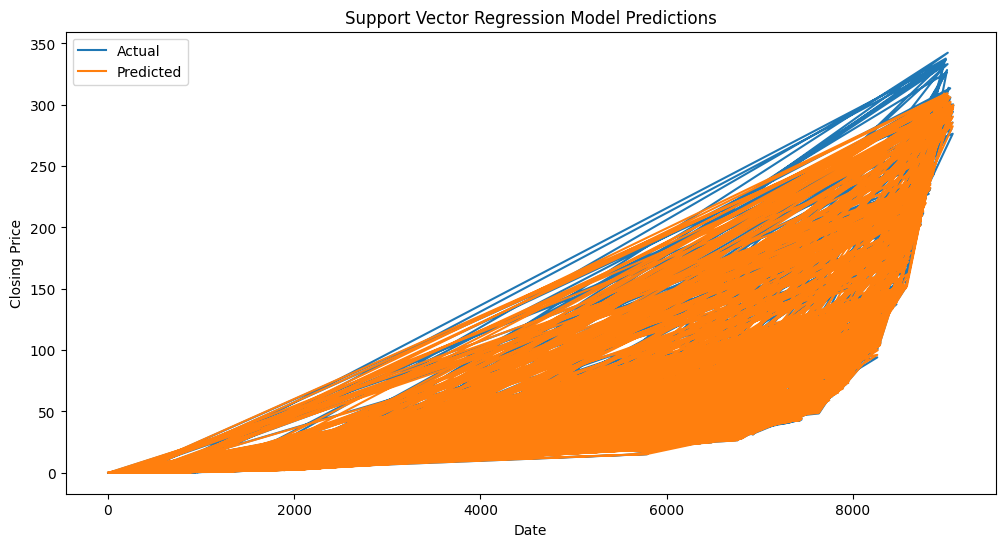

In [ ]:
# @title support vector using bayesian values
import pandas as pd
import numpy as np
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import time
start=time.time()

# Load the dataset
df = pd.read_csv('MSFT.csv')



# Split the data into features (X) and target (y)
X = df[['High','Low','Open']]
y = df['Close']


# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Scale the features using the StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# Create a support vector regression model object
model = SVR(kernel='rbf', C=3.226006340040651, gamma=0.1408961921129918) # used  parameters found via bayesian optimziation


# Train the model on the training set
model.fit(X_train_scaled, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test_scaled)

# Compute the mean squared error of the predictions
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

# Plot the predicted and actual closing prices over time
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred}, index=y_test.index)
plt.figure(figsize=(12,6))
plt.plot(results.index, results['Actual'].values, label='Actual')
plt.plot(results.index, results['Predicted'], label='Predicted')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('Support Vector Regression Model Predictions')
plt.show()

end=time.time()

In [ ]:
print("Time take to run SVR with Bayesian Optimization",end-start)

Time take to run SVR with Bayesian Optimization 180.5709798336029


In [ ]:
pip install scikit-optimize

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.3/100.3 kB 6.0 MB/s eta 0:00:00


In [ ]:
%pip install bayesian-optimization==1.4.1

Reason for being yanked: https://github.com/fmfn/BayesianOptimization/pull/388


In [ ]:
#@title default xgboost
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import mean_squared_error
import statistics
from sklearn.metrics import mean_absolute_error as mae
import time
start=time.time()

# Load the data from CSV file
df = pd.read_csv('MSFT.csv')

# Preprocess the data and extract features


# Split the data into features and target variable
X = df[['High', 'Low','Open']]
y = df['Close']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the XGBoost model
model = xgb.XGBRegressor()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

end=time.time()


Mean Squared Error: 0.6241777431473317


In [ ]:
print("Time taken for default XgBoost ",end-start)

Time taken for default XgBoost  0.6142222881317139


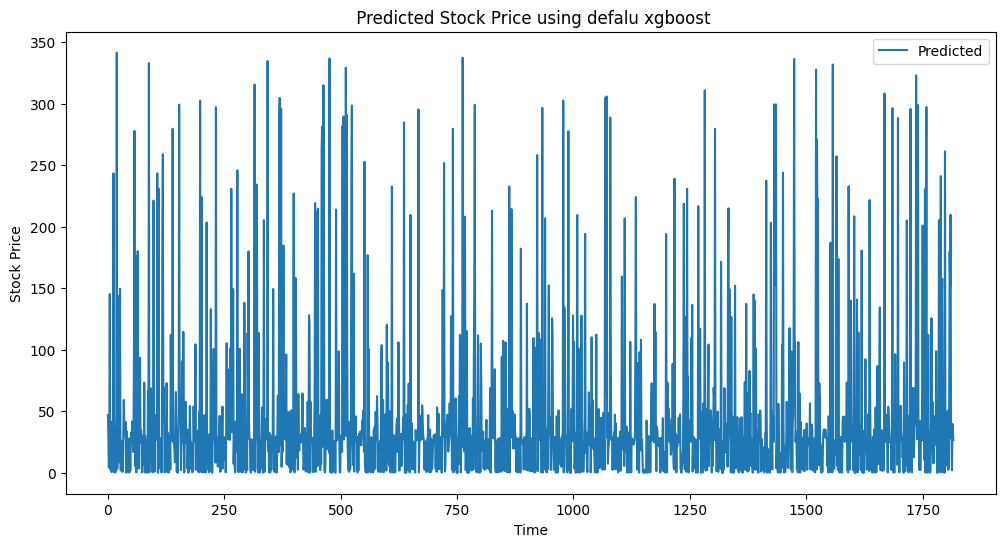

In [ ]:
# Plot actual vs. predicted values
plt.figure(figsize=(12, 6))
# plt.plot(y_test.values, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.title(' Predicted Stock Price using defalu xgboost')
plt.legend()
plt.show()


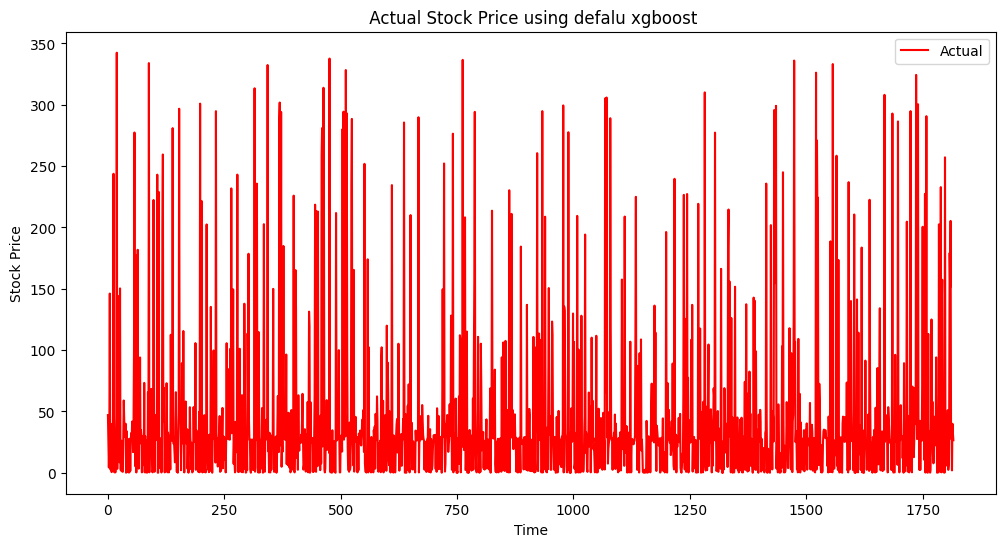

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(y_test.values, label='Actual',color='red')

plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.title(' Actual Stock Price using defalu xgboost')
plt.legend()
plt.show()


In [ ]:
#@title future predictions using default xgboost model
# You can use the most recent values or create a separate dataset with future dates
future_features = df[['High', 'Low', 'Open']].tail(30)  # Example: Using the most recent 30 values

# Predict future stock values
future_predictions = model.predict(future_features)

print("Future Predictions:")
print(future_predictions)


Future Predictions:
[302.48492 295.3897  295.86026 300.28897 298.75906 297.20438 289.05753
 288.36823 281.7535  294.648   297.13425 298.22525 295.50235 300.09177
 295.99393 295.2258  279.38254 276.35904 287.92413 284.6229  280.4435
 279.59332 286.41852 289.5107  295.2258  298.7318  299.3346  304.10193
 302.45752 303.85608]


[302.48492 295.3897  295.86026 300.28897 298.75906 297.20438 289.05753
 288.36823 281.7535  294.648   297.13425 298.22525 295.50235 300.09177
 295.99393 295.2258  279.38254 276.35904 287.92413 284.6229  280.4435
 279.59332 286.41852 289.5107  295.2258  298.7318  299.3346  304.10193
 302.45752 303.85608]


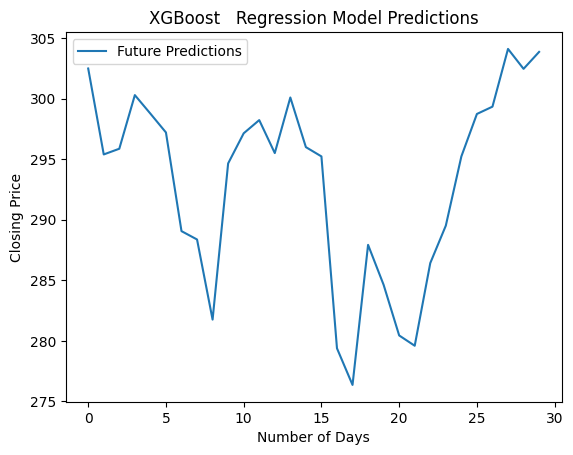

In [ ]:
print(future_predictions)
plt.plot(future_predictions,label='Future Predictions')
plt.legend()
plt.xlabel('Number of Days')
plt.ylabel('Closing Price')
plt.title('XGBoost   Regression Model Predictions')
plt.show()


In [ ]:
# @title improved xg boost with Baysian optimize for
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from bayes_opt import BayesianOptimization
import time
start=time.time()


# Load the data from CSV file
df = pd.read_csv('MSFT.csv')



# Split the data into features and target variable
X = df[['High', 'Low', 'Open']]
y = df['Close']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the XGBoost evaluation function
def xgb_evaluate(max_depth, subsample, colsample_bytree, eta, gamma, alpha, lambda_):
    params = {
        'max_depth': int(max_depth),
        'subsample': max(min(subsample, 1), 0),
        'colsample_bytree': max(min(colsample_bytree, 1), 0),
        'eta': max(eta, 0),
        'gamma': max(gamma, 0),
        'alpha': max(alpha, 0),
        'lambda': max(lambda_, 0),
        'objective': 'reg:squarederror',
        'eval_metric': 'rmse'
    }

    dtrain = xgb.DMatrix(X_train, label=y_train)
    cv_result = xgb.cv(params, dtrain, num_boost_round=100, nfold=5)
    return -cv_result['test-rmse-mean'].iloc[-1]  # Negative since Bayesian Optimization aims to minimize


# Define the parameter bounds for Bayesian Optimization
pbounds = {
    'max_depth': (3, 10),
    'subsample': (0.5, 1),
    'colsample_bytree': (0.5, 1),
    'eta': (0.001, 0.1),
    'gamma': (0, 1),
    'alpha': (0, 1),
    'lambda_': (0, 1)
}


# Perform Bayesian Optimization
optimizer = BayesianOptimization(f=xgb_evaluate, pbounds=pbounds, random_state=42)
optimizer.maximize(init_points=10, n_iter=20)

# Retrieve the best hyperparameters
best_params = optimizer.max['params']
print("Best Hyperparameters:", best_params)

end=time.time()
print("Time taken for XgBoost with Bayesian Optimization",end-start)

|   iter    |  target   |   alpha   | colsam... |    eta    |   gamma   |  lambda_  | max_depth | subsample |
-------------------------------------------------------------------------------------------------------------
| 1         | -0.7069   | 0.3745    | 0.9754    | 0.07347   | 0.5987    | 0.156     | 4.092     | 0.529     |
| 2         | -0.7239   | 0.8662    | 0.8006    | 0.0711    | 0.02058   | 0.9699    | 8.827     | 0.6062    |
| 3         | -3.246    | 0.1818    | 0.5917    | 0.03112   | 0.5248    | 0.4319    | 5.039     | 0.8059    |
| 4         | -1.929    | 0.1395    | 0.6461    | 0.03727   | 0.4561    | 0.7852    | 4.398     | 0.7571    |
| 5         | -0.8293   | 0.5924    | 0.5232    | 0.06115   | 0.1705    | 0.06505   | 9.642     | 0.9828    |
| 6         | -24.99    | 0.8084    | 0.6523    | 0.01067   | 0.6842    | 0.4402    | 3.854     | 0.7476    |
| 7         | -4.971    | 0.03439   | 0.9547    | 0.02662   | 0.6625    | 0.3117    | 6.64      | 0.7734    |
| 8       

In [ ]:
print("Time taken for XgBoost with Bayesian Optimization",end-start)

Time taken for XgBoost with Bayesian Optimization 106.70975041389465


In [ ]:
#@title xgboost with bayesian parameters
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import xgboost as xgb
import time
start=time.time()

# Load the data from CSV file
df = pd.read_csv('MSFT.csv')

# Preprocess the data and extract features
# Ensure that your dataset has appropriate columns for features and target variable

# Split the data into features and target variable
X = df[['High', 'Low', 'Open']]  # Replace 'feature1', 'feature2', ... with your actual feature columns
y = df['Close']  # Replace 'Close' with your actual target variable column

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = xgb.XGBRegressor(
    max_depth=int(4.091961642353418),
    subsample=0.5290418060840998,
    colsample_bytree=0.9753571532049581,
    eta=0.07346740023932911,
    gamma=0.5986584841970366,
    alpha=0.3745401188473625,
    reg_lambda=0.15601864044243652
)
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)
time.sleep(2)
end=time.time()





Mean Squared Error: 0.45842881239394007


In [ ]:
print("time taken to run  XGBoost with optimzed parameters ",end-start)

time taken to run  XGBoost with optimzed parameters  2.3004281520843506


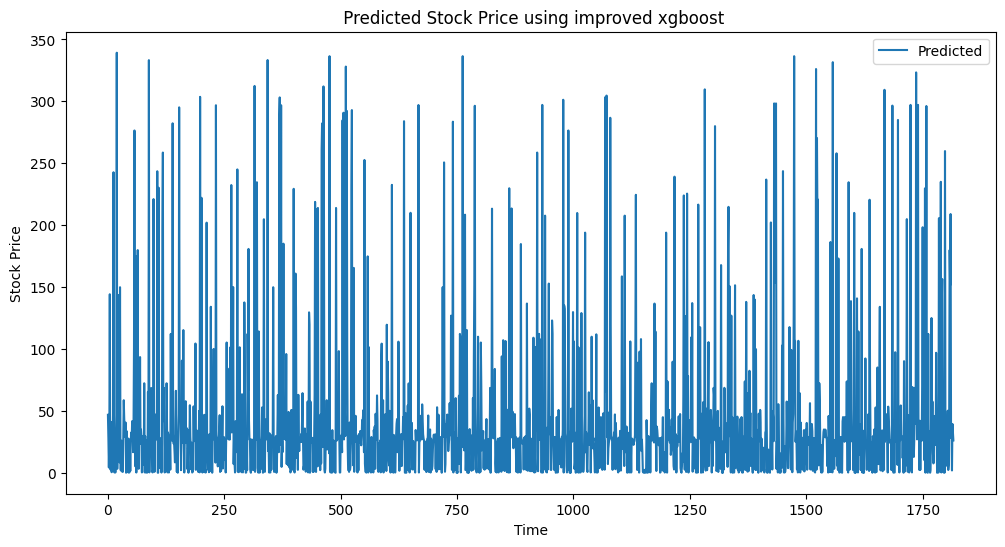

In [ ]:
# Plot actual vs. predicted values
plt.figure(figsize=(12, 6))
# plt.plot(y_test.values, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.title(' Predicted Stock Price using improved xgboost')
plt.legend()
plt.show()


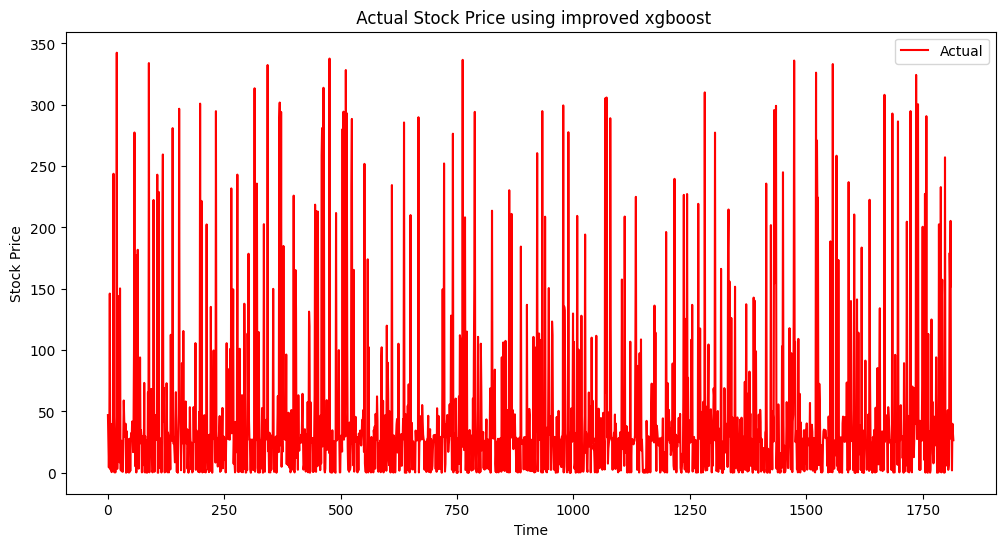

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(y_test.values, label='Actual',color='red')

plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.title(' Actual Stock Price using improved xgboost')
plt.legend()
plt.show()


In [ ]:
#@title future predictions using improved  xgboost model
# You can use the most recent values or create a separate dataset with future dates
future_features = df[['High', 'Low', 'Open']].tail(30)  # Example: Using the most recent 30 values

# Predict future stock values
future_predictions = model.predict(future_features)

print("Future Predictions:")
print(future_predictions)


Future Predictions:
[303.09067 297.67587 296.3276  300.3285  297.6653  296.27054 291.73135
 287.56567 284.7874  290.0326  295.99918 296.68307 296.77386 297.6653
 297.019   297.07275 283.16797 276.1814  286.02695 284.0035  283.56348
 283.60873 284.3371  290.8411  296.65204 297.16373 298.35806 303.25647
 301.311   301.55597]


[303.09067 297.67587 296.3276  300.3285  297.6653  296.27054 291.73135
 287.56567 284.7874  290.0326  295.99918 296.68307 296.77386 297.6653
 297.019   297.07275 283.16797 276.1814  286.02695 284.0035  283.56348
 283.60873 284.3371  290.8411  296.65204 297.16373 298.35806 303.25647
 301.311   301.55597]


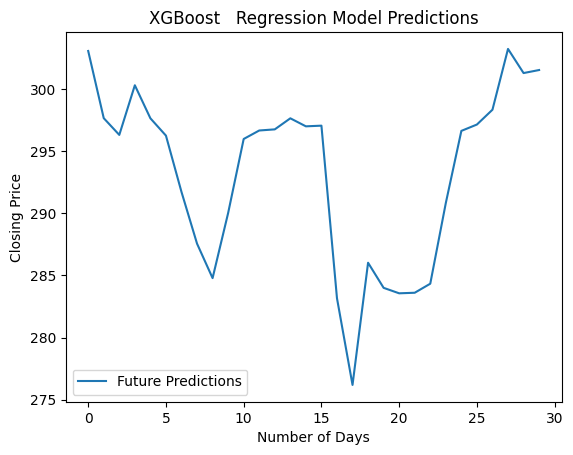

In [ ]:
print(future_predictions)
plt.plot(future_predictions,label='Future Predictions')
plt.legend()
plt.xlabel('Number of Days')
plt.ylabel('Closing Price')
plt.title('XGBoost   Regression Model Predictions')
plt.show()


Mean Squared Error: 42.52031497555064


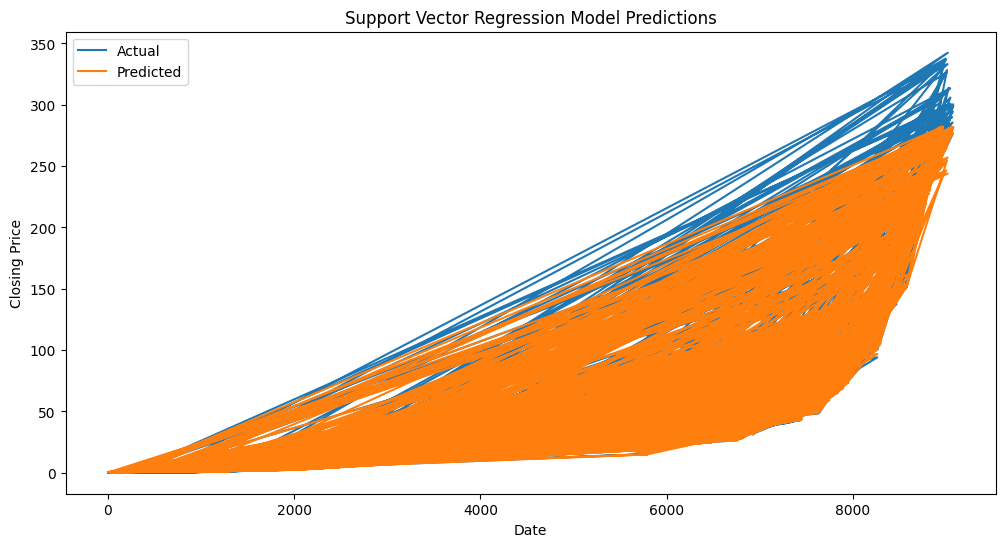

In [ ]:
# @title support vector
import pandas as pd
import numpy as np
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import time
start=time.time()

# Load the dataset
df = pd.read_csv('MSFT.csv')



# Split the data into features (X) and target (y)
X = df[['High','Low','Open']]
y = df['Close']


# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Scale the features using the StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create a support vector regression model object
# Create a support vector regression model object
model = SVR(kernel='rbf', C=1, gamma='scale')


# Train the model on the training set
model.fit(X_train_scaled, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test_scaled)

# Compute the mean squared error of the predictions
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

# Plot the predicted and actual closing prices over time
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred}, index=y_test.index)
plt.figure(figsize=(12,6))
plt.plot(results.index, results['Actual'].values, label='Actual')
plt.plot(results.index, results['Predicted'], label='Predicted')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('Support Vector Regression Model Predictions')
plt.show()

end=time.time()

In [ ]:
print("time taken to run default svr model",end-start)

time taken to run default svr model 4.350696325302124


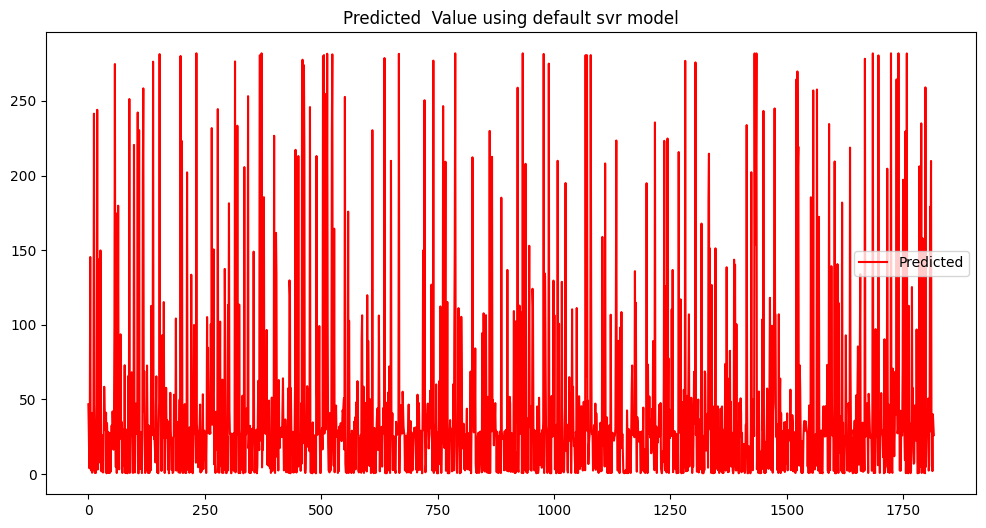

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(results['Predicted'].values,color='red',label='Predicted')

plt.title("Predicted  Value using default svr model")
plt.legend()

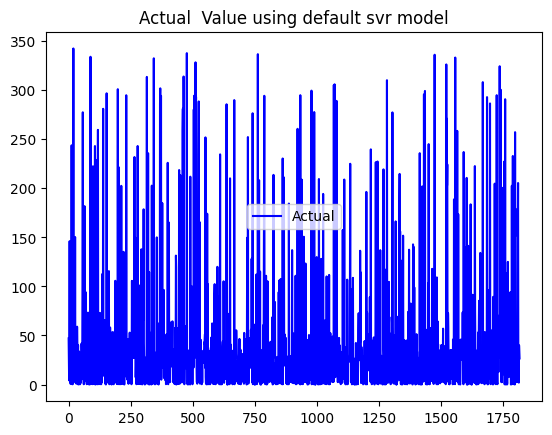

In [ ]:
plt.plot(results['Actual'].values,color='blue',label='Actual')
plt.title("Actual  Value using default svr model")
plt.legend()

In [ ]:
# future values prediction SVR
future_features=X[['High','Low','Open']].tail(30)
# Plot the predicted and actual closing prices over time
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred}, index=y_test.index)
future_dates = pd.date_range(start=df.index[-1], periods=30, freq='B')
future_features_scaled = scaler.transform(future_features)
future_predictions = model.predict(future_features_scaled)
future_results = pd.DataFrame({'Predicted': future_predictions}, index=future_dates)

[280.14238001 281.17776279 281.86492064 281.63139367 281.84572894
 281.79670457 281.32482932 280.2000796  279.94886164 273.66423124
 281.91509982 281.92218404 281.91400133 281.86597098 281.30560643
 281.5367493  279.28499321 274.50329106 279.18901247 278.69406149
 279.45110501 276.99739161 277.9887365  280.69583128 281.7212395
 281.88832636 281.81659045 281.26335188 281.45344932 281.40888537]


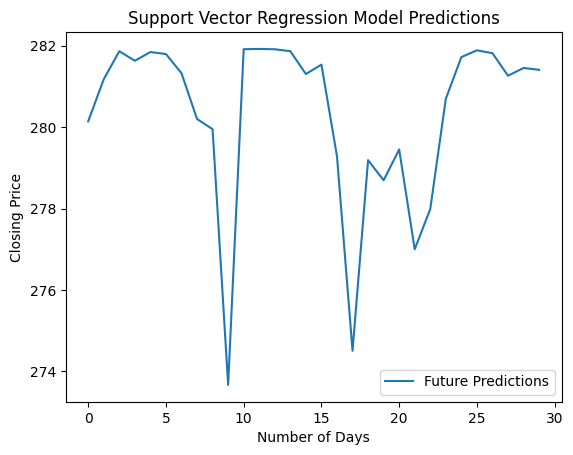

In [ ]:
#@title future predictions using default SVR model
print(future_predictions)
plt.plot(future_predictions,label='Future Predictions')
plt.legend()
plt.xlabel('Number of Days')
plt.ylabel('Closing Price')
plt.title('Support Vector Regression Model Predictions')
plt.show()



Mean Squared Error: 0.4607325358215174


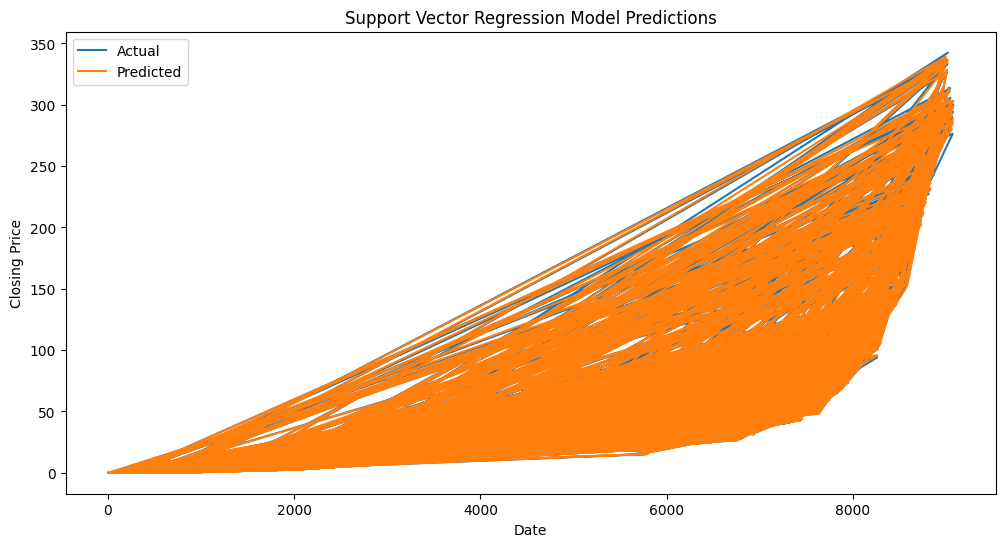

In [ ]:
# @title support vector using optimized PSO parameters
import pandas as pd
import numpy as np
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

import time
start=time.time()

# Load the dataset
df = pd.read_csv('MSFT.csv')



# Split the data into features (X) and target (y)
X = df[['High','Low','Open']]
y = df['Close']


# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Scale the features using the StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create a support vector regression model object

model = SVR(kernel='rbf', C=29.68385865, gamma=15.71391061) #these parameters are taken from the SVR with pso code which as done initially


# Train the model on the training set
model.fit(X_train_scaled, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test_scaled)

# Compute the mean squared error of the predictions
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

# Plot the predicted and actual closing prices over time
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred}, index=y_test.index)
plt.figure(figsize=(12,6))
plt.plot(results.index, results['Actual'].values, label='Actual')
plt.plot(results.index, results['Predicted'], label='Predicted')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('Support Vector Regression Model Predictions')
plt.show()

end=time.time()

In [ ]:
print("time taken to run PSO svr model",end-start)

time taken to run PSO svr model 5.100045442581177


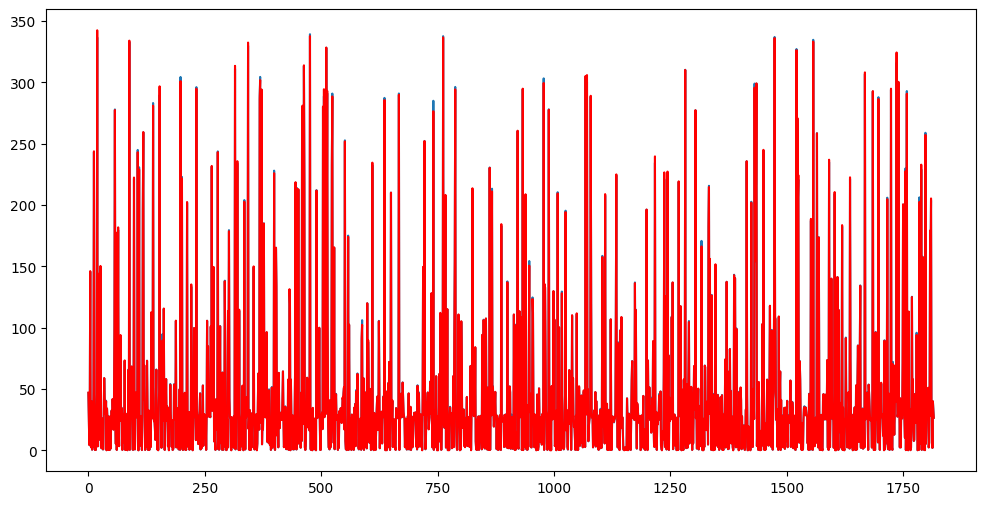

In [ ]:
# results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred}, index=y_test.index)
plt.figure(figsize=(12,6))
plt.plot(y_pred)
plt.plot(y_test.values,color='red')

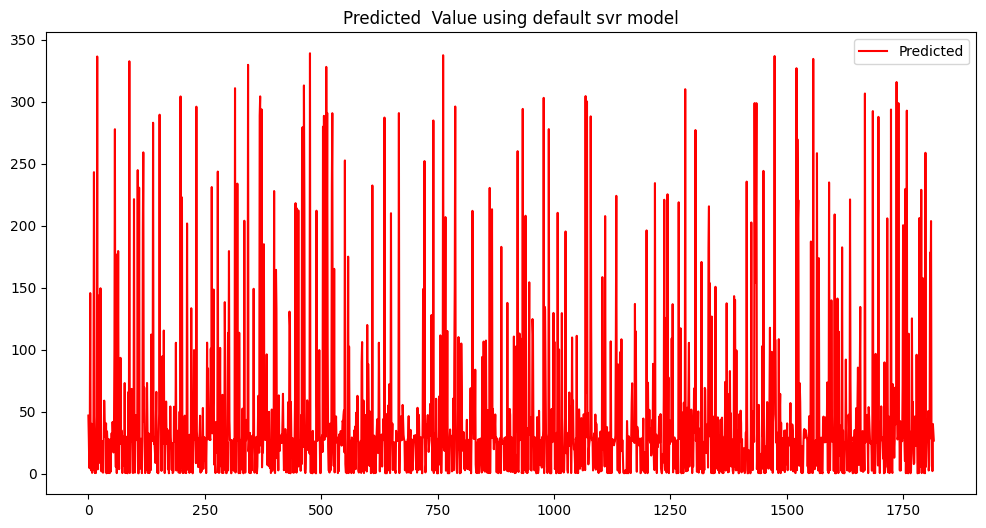

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(results['Predicted'].values,color='red',label='Predicted')

plt.title("Predicted  Value using default svr model")
plt.legend()

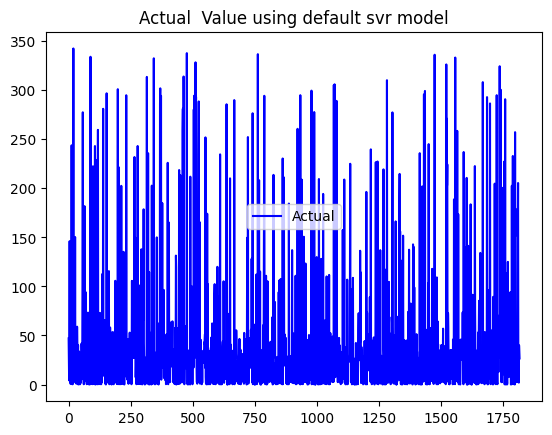

In [ ]:
plt.plot(results['Actual'].values,color='blue',label='Actual')
plt.title("Actual  Value using default svr model")
plt.legend()

In [ ]:
# future values prediction SVR
future_features=X[['High','Low','Open']].tail(30)
# Plot the predicted and actual closing prices over time
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred}, index=y_test.index)
future_dates = pd.date_range(start=df.index[-1], periods=30, freq='B')
future_features_scaled = scaler.transform(future_features)
future_predictions = model.predict(future_features_scaled)
future_results = pd.DataFrame({'Predicted': future_predictions}, index=future_dates)

[306.58587991 294.93977838 296.58606241 299.02082441 299.7891585
 292.91900813 289.96319858 289.80661038 279.97980233 244.12622059
 297.20958958 298.24294035 298.83506913 299.21682407 294.28986794
 290.92889189 278.50840245 273.15599049 288.94778765 287.33222595
 282.30094045 284.98149013 287.04989442 288.694802   295.09848275
 298.98827552 298.95925889 303.95954875 303.23928196 303.24775764]


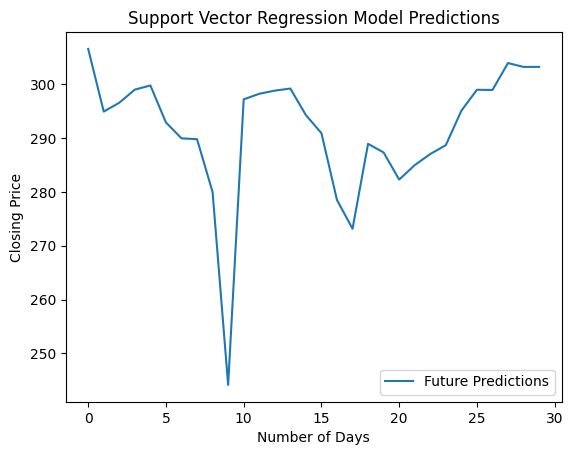

In [ ]:
#@title future predictions using improved   SVR model
print(future_predictions)
plt.plot(future_predictions,label='Future Predictions')
plt.legend()
plt.xlabel('Number of Days')
plt.ylabel('Closing Price')
plt.title('Support Vector Regression Model Predictions')
plt.show()
